Extracting Data From Fred Data Base

In [77]:
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime
from pandas.tseries.offsets import MonthBegin

start = datetime(2014,1,1)
end = datetime(2025,11,30)

fred_df = pd.DataFrame()
fred_df['USD_INR'] = web.DataReader('DEXINUS', 'fred', start, end)
fred_df['CPI_USA'] = web.DataReader('MEDCPIM158SFRBCLE', 'fred', start, end)
fred_df['Crude_Oil'] = web.DataReader('DCOILWTICO', 'fred', start, end)
fred_df['Trade_Balance_India'] = web.DataReader('XTEXVA01INM667S ', 'fred', start, end)
fred_df['US_Rate_EFFR'] = web.DataReader("FEDFUNDS", "fred", start, end)


Interpolating missing Data with Previous Values and averaging out the data on monthly basis

In [78]:
fred_df.reset_index(inplace=True)
fred_df['USD_INR'] = fred_df['USD_INR'].interpolate(method='linear', limit_direction='both')
fred_df['Crude_Oil'] = fred_df['Crude_Oil'].interpolate(method='linear', limit_direction='both')
fred_df.resample('ME',on ='DATE').mean()
fred_df.dropna(inplace=True)

Converting all dates to start of the month

In [79]:
fred_df['DATE']=pd.to_datetime(fred_df['DATE'],format='%m%Y',errors='coerce')
fred_df = fred_df.dropna(subset=['DATE'])
fred_df['DATE'] = fred_df['DATE'] - MonthBegin(1)
fred_df.rename(columns={'DATE':'Date'},inplace=True)
fred_df

,Date,USD_INR,CPI_USA,Crude_Oil,Trade_Balance_India,US_Rate_EFFR
0,2013-12-01,62.310,2.406327,95.140,2.678252e+10,0.07
64,2014-03-01,59.860,2.214932,99.690,2.634899e+10,0.09
86,2014-04-01,60.110,2.545627,99.690,2.799275e+10,0.09
129,2014-06-01,60.050,2.404904,106.060,2.600628e+10,0.09
152,2014-07-01,61.200,1.751737,97.860,2.795354e+10,0.09
...,...,...,...,...,...,...
2956,2025-04-01,84.580,2.695123,60.590,3.802151e+10,4.33
2999,2025-06-01,85.580,3.367945,66.640,3.736336e+10,4.33
3022,2025-07-01,87.540,3.368096,68.390,3.627925e+10,4.33
3043,2025-08-01,88.165,2.384737,65.155,3.592263e+10,4.22


Extracting RBI Repo Rate From Website

In [80]:
"""
import pandas as pd
import requests
import io
url = 'https://basunivesh.com/rbi-repo-rate-history-from-2000/'
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=header)
tables = pd.read_html(io.StringIO(response.text))
repo_df = tables[0]
repo_df.columns = repo_df.iloc[0]
repo_df = repo_df[1:].reset_index(drop=True)
repo_df['Date'] = repo_df['Date'].str.replace('–', '-', regex=False)
repo_df['Date'] = pd.to_datetime(repo_df['Date'], dayfirst=True)
repo_df['RBI Repo Rate'] = repo_df['RBI Repo Rate'].str.replace('%', '', regex=False).astype(float)
repo_df.to_excel('RBI_Repo_Rate.xlsx', index=False)
"""

'\nimport pandas as pd\nimport requests\nimport io\nurl = \'https://basunivesh.com/rbi-repo-rate-history-from-2000/\'\nheader = {\n  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"\n}\nresponse = requests.get(url, headers=header)\ntables = pd.read_html(io.StringIO(response.text))\nrepo_df = tables[0]\nrepo_df.columns = repo_df.iloc[0]\nrepo_df = repo_df[1:].reset_index(drop=True)\nrepo_df[\'Date\'] = repo_df[\'Date\'].str.replace(\'–\', \'-\', regex=False)\nrepo_df[\'Date\'] = pd.to_datetime(repo_df[\'Date\'], dayfirst=True)\nrepo_df[\'RBI Repo Rate\'] = repo_df[\'RBI Repo Rate\'].str.replace(\'%\', \'\', regex=False).astype(float)\nrepo_df.to_excel(\'RBI_Repo_Rate.xlsx\', index=False)\n'

Was getting bloacked by website so downloaded html to extract the data for the same

In [81]:
import pandas as pd
import io
from bs4 import BeautifulSoup
file_path = 'RBI Repo Rate History from 2000 to 2025 (5th December 2025).html'
with open(file_path, 'r', encoding='utf-8') as f:
    html_content = f.read()
tables = pd.read_html(io.StringIO(html_content))
repo_df = tables[0]
repo_df.columns = repo_df.iloc[0]
repo_df = repo_df[1:].reset_index(drop=True)
repo_df['Date'] = repo_df['Date'].str.replace('–', '-', regex=False)
repo_df['Date'] = pd.to_datetime(repo_df['Date'], dayfirst=True, errors='coerce')
repo_df = repo_df.dropna(subset=['Date'])
repo_df['Date'] = repo_df['Date'] - MonthBegin(1)
repo_df['RBI Repo Rate'] = repo_df['RBI Repo Rate'].astype(str).str.replace('%', '', regex=False).astype(float)
repo_df

,Date,RBI Repo Rate
0,2025-12-01,5.25
1,2025-09-01,5.50
2,2025-06-01,5.50
3,2025-04-01,6.00
4,2025-02-01,6.25
...,...,...
104,2000-06-01,9.60
105,2000-06-01,9.30
106,2000-06-01,9.10
107,2000-06-01,9.00


Importing data from excel about Foreign Exchange Reserves

In [82]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
df = pd.read_excel('Foreign Exchange Reserves.xlsx', skiprows=3)
reserves_df = df.iloc[2:].copy()
new_column_names = list(df.columns)
new_column_names[13] = 'Total_Reserves_USD'
reserves_df.columns = new_column_names
reserves_df['Year'] = pd.to_numeric(reserves_df['Year'], errors='coerce')
reserves_df = reserves_df.dropna(subset=['Year']).reset_index(drop=True)
reserves_df['Date'] = pd.to_datetime(
    reserves_df['Year'].astype(int).astype(str) + '-' + reserves_df['Month'].astype(str) + '-01',
    format='%Y-%b-%d'
)
reserves_df = reserves_df[[ 'Date', 'Total_Reserves_USD']]
reserves_df

,Date,Total_Reserves_USD
0,2025-12-01,687734.274
1,2025-11-01,687929.818
2,2025-10-01,689732.836
3,2025-09-01,700088.694
4,2025-08-01,695358.144
...,...,...
425,1990-07-01,3553
426,1990-06-01,3685
427,1990-05-01,3701
428,1990-04-01,3625


Importing Indian CPI data from Excel

In [83]:
import pandas as pd
cpi_df=pd.read_excel('rbi_cpi_IND.xlsx',skiprows=5)
cpi_df=cpi_df[1:]
clmns=list(cpi_df.columns)
clmns[1]='Date'
clmns[5]='Ind_CPI'
cpi_df.columns=clmns
cpi_df=cpi_df[['Date','Ind_CPI']]
cpi_df = cpi_df.dropna(subset=['Date','Ind_CPI'])
cpi_df['Date']=pd.to_datetime(cpi_df['Date'],errors='coerce') - MonthBegin(1)
cpi_df['Ind_CPI']=pd.to_numeric(cpi_df['Ind_CPI'],errors='coerce')
cpi_df

,Date,Ind_CPI
1,2025-10-01,0.71
2,2025-09-01,0.25
3,2025-08-01,1.44
4,2025-07-01,2.07
5,2025-06-01,1.61
...,...,...
139,2014-04-01,8.33
140,2014-03-01,8.48
141,2014-02-01,8.25
142,2014-01-01,7.88


Merging all dataframes into one and cleaning the data.

In [84]:
from typing_extensions import final
dfs=[fred_df,repo_df,reserves_df,cpi_df]
final_df=dfs[0]
for nxt in dfs[1:] :
  final_df = pd.merge(final_df, nxt, on='Date',how='outer')
final_df = final_df.ffill()
final_df = final_df.where(final_df['Date']>'2014-01-01')
final_df.dropna(inplace=True)
final_df.set_index('Date',inplace=True)
final_df
#final_df.to_excel('final_df.xlsx',index=False)


/tmp/ipython-input-978572063.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df = final_df.ffill()


,USD_INR,CPI_USA,Crude_Oil,Trade_Balance_India,US_Rate_EFFR,RBI Repo Rate,Total_Reserves_USD,Ind_CPI
Date,,,,,,,,
2014-02-01,62.310,2.406327,95.140,2.678252e+10,0.07,8.00,294360.200,8.25
2014-03-01,59.860,2.214932,99.690,2.634899e+10,0.09,8.00,304223.200,8.48
2014-04-01,60.110,2.545627,99.690,2.799275e+10,0.09,8.00,310986.300,8.33
2014-05-01,60.110,2.545627,99.690,2.799275e+10,0.09,8.00,312207.000,6.77
2014-06-01,60.050,2.404904,106.060,2.600628e+10,0.09,8.00,316138.000,7.39
...,...,...,...,...,...,...,...,...
2025-08-01,88.165,2.384737,65.155,3.592263e+10,4.22,5.50,695358.144,1.44
2025-09-01,88.690,1.078007,62.590,3.489003e+10,4.09,5.50,700088.694,0.25
2025-10-01,88.690,1.078007,62.590,3.489003e+10,4.09,5.50,689732.836,0.71


Plot for USD/INR for given period

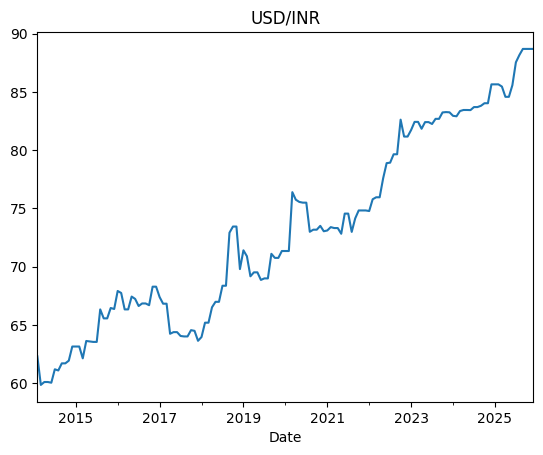

In [85]:
import matplotlib.pyplot as plt
final_df['USD_INR'].plot(title='USD/INR')
plt.show()


In [86]:
y = final_df['USD_INR']
x = final_df.copy()


Scaled down the data for correlation

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(
    scaler.fit_transform(x),
    columns=x.columns,
    index=x.index
)

Plot of correlation Matrix

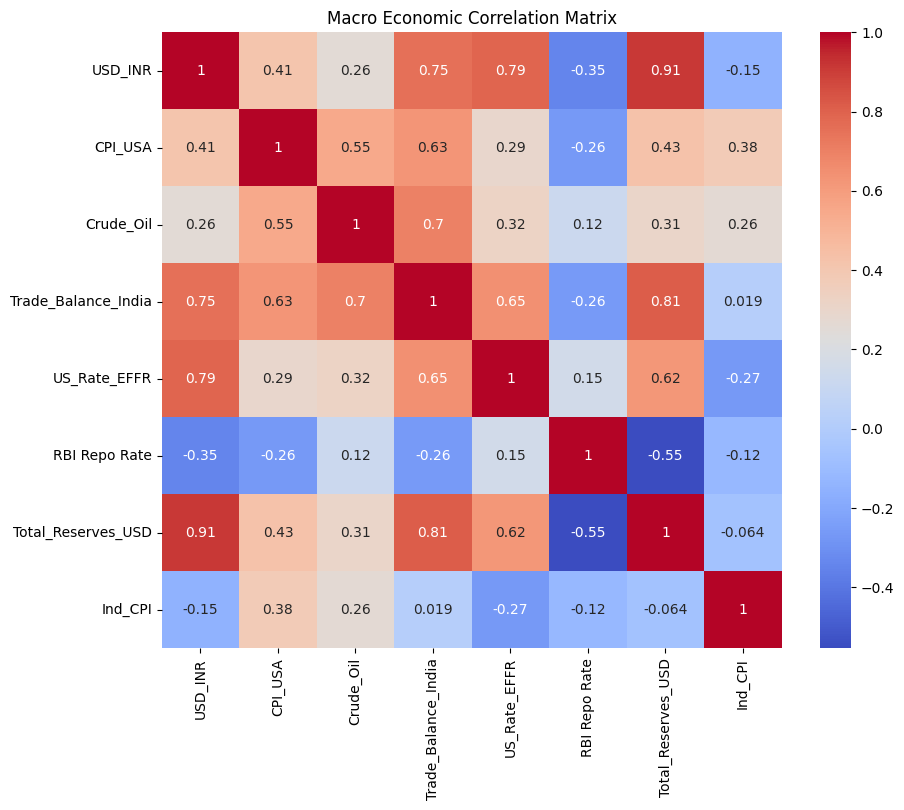

In [88]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(x_scaled.corr(), annot=True,cmap='coolwarm')
plt.title("Macro Economic Correlation Matrix")
plt.show()

In [89]:
x_scaled = x_scaled.drop(columns=['USD_INR'])

Calculate Variance Inflation Factor for Dataset to detect Multicollinearity in regression and found out that Trade Balance and Total resrves are highly correlated and redundant

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = x_scaled.columns
vif["VIF"] = [
    variance_inflation_factor(x_scaled.values, i)
    for i in range(x_scaled.shape[1])
]
vif

,Variable,VIF
0,CPI_USA,2.428974
1,Crude_Oil,4.017389
2,Trade_Balance_India,11.112152
3,US_Rate_EFFR,4.515682
4,RBI Repo Rate,4.449314
5,Total_Reserves_USD,10.033527
6,Ind_CPI,1.588790


Finding the best fit line using Ordinary Least Squares based on dependennt variables
Found that main drivers of Exchange rate is US EFFR, US CPI, Total Reserves, surprizingly rbi rate and IND cpi are not well related to USD/INR

In [91]:
import statsmodels.api as sm
x_ols = sm.add_constant(x_scaled)
ols_model = sm.OLS(y,x_ols).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                USD_INR   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     261.4
Date:                Sun, 08 Feb 2026   Prob (F-statistic):           3.17e-75
Time:                        10:51:01   Log-Likelihood:                -311.05
No. Observations:                 143   AIC:                             638.1
Df Residuals:                     135   BIC:                             661.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  73.0614    

ADF test to find if exhange rate is stationary or not.
Non stationary data gives bad eresult in OLS as The data has a trend

In [92]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(y)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


ADF Statistic: -0.1207996264162772
p-value: 0.947326996610449


In [93]:
y

,USD_INR
Date,
2014-02-01,62.310
2014-03-01,59.860
2014-04-01,60.110
2014-05-01,60.110
2014-06-01,60.050
...,...
2025-08-01,88.165
2025-09-01,88.690
2025-10-01,88.690


Converting exchange rates to Difference in exhange rate Month Over Month

In [94]:
y_diff = y.diff().dropna()
y_diff

,USD_INR
Date,
2014-03-01,-2.450
2014-04-01,0.250
2014-05-01,0.000
2014-06-01,-0.060
2014-07-01,1.150
...,...
2025-08-01,0.625
2025-09-01,0.525
2025-10-01,0.000


Re-Testing for ADF on Change in exchange rate MoM

In [95]:
from statsmodels.tsa.stattools import adfuller

adf_diff = adfuller(y_diff)
print(f"ADF Statistic (diff): {adf_diff[0]}")
print(f"p-value (diff): {adf_diff[1]}")


ADF Statistic (diff): -13.593286176179253
p-value (diff): 2.0173764778844083e-25


ADF on rest of the data

In [96]:
data_cols = ['CPI_USA','Crude_Oil','Trade_Balance_India',
             'US_Rate_EFFR','RBI Repo Rate','Total_Reserves_USD','Ind_CPI']

for col in data_cols:
    stat, p, *_ = adfuller(final_df[col].dropna())
    print(col, round(p,4))


CPI_USA 0.4995
Crude_Oil 0.0972
Trade_Balance_India 0.7871
US_Rate_EFFR 0.3756
RBI Repo Rate 0.2836
Total_Reserves_USD 0.8724
Ind_CPI 0.7011


Converting data into change in MoM

In [97]:
exog = final_df[['CPI_USA','Crude_Oil','Trade_Balance_India',
                 'US_Rate_EFFR','RBI Repo Rate','Total_Reserves_USD','Ind_CPI']]

exog_diff = exog.diff().dropna()

Recalculating ADF on MoM Difference

In [98]:
for col in exog_diff.columns:
    stat, p, *_ = adfuller(exog_diff[col])
    print(col, round(p,4))

CPI_USA 0.0
Crude_Oil 0.0
Trade_Balance_India 0.0
US_Rate_EFFR 0.0657
RBI Repo Rate 0.0008
Total_Reserves_USD 0.0
Ind_CPI 0.0001


Scaling down the MoM change data using Standard Scaler

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
exog_scaled = pd.DataFrame(
    scaler.fit_transform(exog_diff),
    columns=exog_diff.columns,
    index=exog_diff.index
)

Reindexing data after MoM change

In [100]:
y_diff = final_df['USD_INR'].diff().dropna()
y_final = y_diff.loc[exog_diff.index]


SARIMAX model (past value=1, no of difference=1, error terms =0) on MoM change of data
showing total reserves is one of the most important factor for USD/INR
The variable ar.L1 has a P-value of 0.000 and The coefficient -0.5459 means that if the USD_INR rate jumped up significantly last month, there is a strong mathematical tendency for it to pull back this month.

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(
    y_final,
    exog=exog_scaled,
    order=(1,1,0),
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:                USD_INR   No. Observations:                  142
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -228.431
Date:                Sun, 08 Feb 2026   AIC                            474.863
Time:                        10:51:01   BIC                            501.338
Sample:                    03-01-2014   HQIC                           485.621
                         - 12-01-2025                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
CPI_USA                -0.0606      0.078     -0.778      0.437      -0.213       0.092
Crude_Oil               0.1517      0.104      1.463      0.143      -0.051       0.355
Trade_Balance_In

Plotting  ARIMAX Residuals

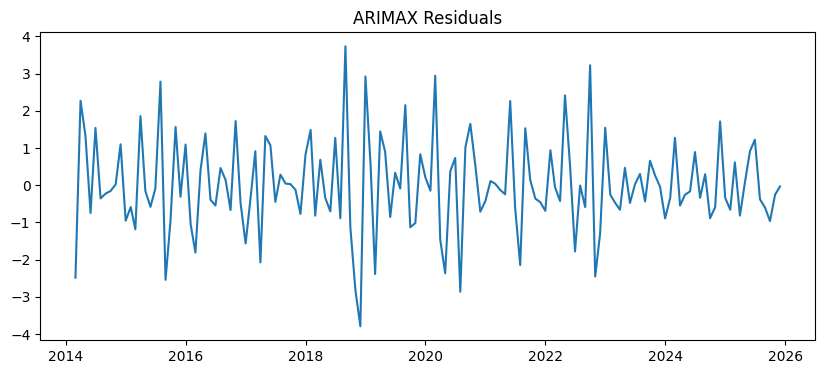

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(result.resid)
plt.title("ARIMAX Residuals")
plt.show()


Forcasting next 6 MoM chnage in USD/INR around forcasted mean within confidance interval

In [103]:
forecast = result.get_forecast(
    steps=6,
    exog=exog_scaled.iloc[-6:]
)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
print(forecast_mean)

2026-01-01    0.220969
2026-02-01   -0.278084
2026-03-01   -0.231957
2026-04-01    0.126668
2026-05-01   -0.102918
2026-06-01    0.056187
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
Plot of ARIMAX Forecast

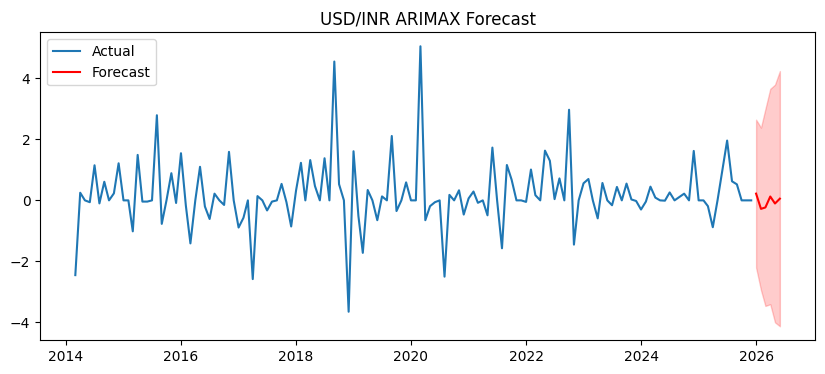

In [104]:
plt.figure(figsize=(10,4))
plt.plot(y_final, label='Actual')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color='red',
    alpha=0.2
)
plt.legend()
plt.title("USD/INR ARIMAX Forecast")
plt.show()


Converting MoM change back to USD/INR using last actual value

In [105]:
last_actual = final_df['USD_INR'].iloc[-1]
usd_inr_forecast_level = last_actual + forecast_mean.cumsum()
forecast_df = pd.concat([
    final_df['USD_INR'],
    usd_inr_forecast_level
])
forecast_df.tail(7)

,0
2025-12-01,88.690000
2026-01-01,88.910969
2026-02-01,88.632885
2026-03-01,88.400927
2026-04-01,88.527595
2026-05-01,88.424677
2026-06-01,88.480864


Final Forecasted Plot Of USD/INR

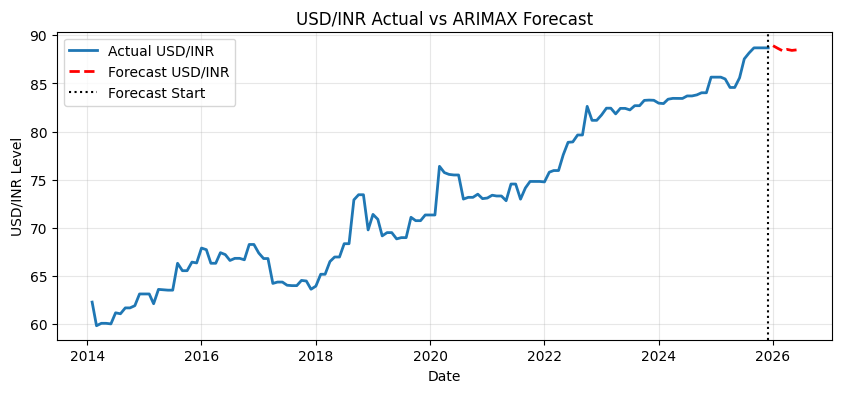

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.plot(final_df['USD_INR'], label='Actual USD/INR', linewidth=2)
plt.plot(usd_inr_forecast_level, label='Forecast USD/INR',
         color='red', linestyle='--', linewidth=2)

plt.axvline(final_df.index[-1], color='black', linestyle=':', label='Forecast Start')

plt.title('USD/INR Actual vs ARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('USD/INR Level')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
